In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')


In [3]:
# dataframe = pd.read_csv('/content/gdrive/MyDrive/train.csv')
dataframe = pd.read_csv('train.csv (2).zip')

dataframe.head(10)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [4]:
dataframe.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [5]:
dataframe.shape

(100000, 28)

In [6]:
dataframe.drop(['ID','Month','SSN','Name'],axis=1,inplace=True)
dataframe.columns


Index(['Customer_ID', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
dataframe.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
dataframe.duplicated().sum()

0

In [9]:
for col in ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']:
    if dataframe[col][dataframe[col]=='_'].any():
        print(col)


Changed_Credit_Limit


In [10]:
dataframe.loc[dataframe.Changed_Credit_Limit=='_','Changed_Credit_Limit'] = np.nan

In [11]:
numeric_columns = dataframe.select_dtypes(include=['int64','float64']).columns
categorical_columns = dataframe.select_dtypes(include=['object']).columns
print(numeric_columns)
print(categorical_columns)

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')
Index(['Customer_ID', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [13]:
for i in dataframe.columns:
    print(f'{i}:{pd.api.types.infer_dtype(dataframe[i])}')

Customer_ID:string
Age:string
Occupation:string
Annual_Income:string
Monthly_Inhand_Salary:floating
Num_Bank_Accounts:integer
Num_Credit_Card:integer
Interest_Rate:integer
Num_of_Loan:string
Type_of_Loan:string
Delay_from_due_date:integer
Num_of_Delayed_Payment:string
Changed_Credit_Limit:string
Num_Credit_Inquiries:floating
Credit_Mix:string
Outstanding_Debt:string
Credit_Utilization_Ratio:floating
Credit_History_Age:string
Payment_of_Min_Amount:string
Total_EMI_per_month:floating
Amount_invested_monthly:string
Payment_Behaviour:string
Monthly_Balance:mixed
Credit_Score:string


In [14]:
wrong = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
for col in wrong:
    dataframe[col] = dataframe[col].str.replace('_','').astype('float64') # we iterate through all wrong columns and replace the missing floating values
dataframe.dtypes


Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [15]:
dataframe['Customer_ID'].value_counts()


CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64

In [16]:
dataframe.Age = dataframe.groupby('Customer_ID').Age.transform(lambda x:x.mode()[0])
dataframe.Annual_Income = dataframe.groupby('Customer_ID').Annual_Income.transform(lambda x:x.mode()[0])
dataframe.Occupation = dataframe.groupby('Customer_ID').Occupation.transform(lambda x:x.mode()[0])
dataframe[['Age','Annual_Income','Occupation']]

,Age,Annual_Income,Occupation
0,23.0,19114.12,Scientist
1,23.0,19114.12,Scientist
2,23.0,19114.12,Scientist
3,23.0,19114.12,Scientist
4,23.0,19114.12,Scientist
...,...,...,...
99995,25.0,39628.99,Mechanic
99996,25.0,39628.99,Mechanic
99997,25.0,39628.99,Mechanic
99998,25.0,39628.99,Mechanic


In [17]:
numeric_columns = dataframe.select_dtypes(include=['int64','float64']).columns
categorical_columns = dataframe.select_dtypes(include=['object']).columns
print(numeric_columns)
print(categorical_columns)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')
Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')


In [18]:
for col in numeric_columns:
    if dataframe[col][dataframe[col]<0].any():
        print(col,len(dataframe[col][dataframe[col]<0]))

Num_Bank_Accounts 21
Num_of_Loan 3876
Delay_from_due_date 591
Num_of_Delayed_Payment 644
Changed_Credit_Limit 1586
Monthly_Balance 9


In [19]:
dataframe.Num_Bank_Accounts[dataframe.Num_Bank_Accounts < 0].value_counts()

-1    21
Name: Num_Bank_Accounts, dtype: int64

In [20]:
dataframe.drop(dataframe[dataframe.Num_Bank_Accounts<0].index,inplace=True)

In [21]:
dataframe.Num_of_Loan[dataframe.Num_of_Loan < 0].value_counts()

-100.0    3875
Name: Num_of_Loan, dtype: int64

In [22]:
dataframe.drop(dataframe[dataframe.Num_of_Loan<0].index,inplace=True)

In [24]:
dataframe.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,96104.000000,96104.000000,81685.000000,96104.000000,96104.000000,96104.000000,96104.000000,96104.000000,89405.000000,94092.000000,94216.000000,96104.000000,96104.000000,96104.000000,91796.000000,9.334300e+04
mean,33.270707,50506.790217,4194.711239,17.096541,22.527606,72.354460,7.164832,21.072650,31.134489,10.394152,27.743090,1427.106101,32.288118,1409.238408,636.061659,-3.213953e+22
std,10.765046,38317.243974,3185.309650,117.309614,129.298964,466.483097,60.321139,14.861229,227.266979,6.795080,192.969963,1155.957167,5.114835,8324.403859,2040.035325,3.272959e+24
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,19337.160000,1625.188333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.022500,28.060916,30.305498,74.549548,2.698778e+02
50%,33.000000,36993.940000,3091.386667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.640000,32.307331,69.246684,135.821176,3.364020e+02
75%,42.000000,71681.400000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.890000,9.000000,1948.980000,36.500450,161.340704,265.579429,4.694649e+02
max,56.000000,179987.280000,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [25]:
unique_value_counts = dataframe['Num_Bank_Accounts'].value_counts().sort_index(ascending=True)
print(unique_value_counts)

0        4151
1        4320
2        4136
3       11492
4       11704
        ...  
1786        1
1789        2
1793        1
1794        2
1798        1
Name: Num_Bank_Accounts, Length: 918, dtype: int64


In [26]:
dataframe.Num_Bank_Accounts[dataframe.Num_Bank_Accounts > 30].value_counts().sum()

1259

In [23]:
print(dataframe.shape)
dataframe.drop(dataframe[dataframe.Num_Bank_Accounts > 30].index,inplace=True)
dataframe.shape

(96104, 24)


(94845, 24)

In [24]:
unique_value_counts = dataframe['Num_Credit_Card'].value_counts()
print(sorted(unique_value_counts,reverse=True))

[17521, 15747, 15663, 13356, 12564, 4700, 4613, 4396, 2043, 2031, 32, 13, 8, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [25]:
dataframe.Num_Credit_Card[dataframe.Num_Credit_Card > 50].value_counts().sum()

2110

In [26]:
print(dataframe.shape)
dataframe.drop(dataframe[dataframe.Num_Credit_Card > 30].index,inplace=True)
dataframe.shape

(94845, 24)


(92705, 24)

In [27]:
dataframe.reset_index(drop=True,inplace=True)
dataframe.shape

(92705, 24)

In [28]:
dataframe.isnull().sum()


Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13888
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10567
Delay_from_due_date             0
Num_of_Delayed_Payment       6462
Changed_Credit_Limit         1949
Num_Credit_Inquiries         1808
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8413
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4148
Payment_Behaviour               0
Monthly_Balance              2657
Credit_Score                    0
dtype: int64

In [29]:
null_columns = ['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']
print(null_columns)

['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']


In [30]:
from sklearn.impute import SimpleImputer
imputdata = SimpleImputer(strategy='mean')
impute_numerical = pd.DataFrame(imputdata.fit_transform(dataframe[null_columns]),columns=null_columns)
impute_numerical.isnull().sum()

Monthly_Inhand_Salary      0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Amount_invested_monthly    0
Monthly_Balance            0
dtype: int64

In [31]:
dataframe[null_columns] = impute_numerical
dataframe.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10567
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8413
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [32]:
dataframe.Occupation.unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect',
       '_______'], dtype=object)

In [33]:
dataframe.Occupation[dataframe.Occupation == '_______'].value_counts().sum()

8

In [34]:
dataframe.drop(dataframe[dataframe.Occupation == '_______'].index,inplace=True)

In [35]:
dataframe.Credit_Mix.value_counts()

Standard    33774
Good        22530
_           18751
Bad         17642
Name: Credit_Mix, dtype: int64

In [36]:
print(categorical_columns)
categorical_columns = categorical_columns.drop('Customer_ID') #we don't need this
categorical_columns = categorical_columns.drop('Credit_Score') # drop as this is the target value, we should not tamper it.
print(categorical_columns)

Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')
Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')


In [39]:
imputer = SimpleImputer(strategy='most_frequent')
impute_categorical = pd.DataFrame(imputer.fit_transform(dataframe[categorical_columns]),columns=categorical_columns)
impute_categorical

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,High_spent_Small_value_payments
1,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,15 Years and 11 Months,No,Low_spent_Large_value_payments
2,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments
3,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,Low_spent_Small_value_payments
4,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,High_spent_Medium_value_payments
...,...,...,...,...,...,...
92692,Mechanic,"Auto Loan, and Student Loan",_,31 Years and 6 Months,No,High_spent_Large_value_payments
92693,Mechanic,"Auto Loan, and Student Loan",_,31 Years and 7 Months,No,High_spent_Medium_value_payments
92694,Mechanic,"Auto Loan, and Student Loan",Good,31 Years and 8 Months,No,High_spent_Large_value_payments
92695,Mechanic,"Auto Loan, and Student Loan",Good,31 Years and 9 Months,No,Low_spent_Large_value_payments


In [40]:
dataframe[categorical_columns] = impute_categorical

In [43]:
dataframe.isnull().sum().any()

True

In [41]:
dataframe.isnull().sum()

Customer_ID                 0
Age                         0
Occupation                  8
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                8
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  8
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          8
Payment_of_Min_Amount       8
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           8
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [42]:
dataframe.dropna(subset=['Occupation','Type_of_Loan','Credit_Mix','Payment_Behaviour'],inplace=True)
dataframe.shape

(92689, 24)

In [43]:
dataframe.isnull().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [44]:
dataframe.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,9.268900e+04
mean,33.276635,50538.607325,4197.976886,5.371198,5.536978,72.882769,7.169891,21.066664,31.169836,10.393679,27.816927,1427.339858,32.289282,1406.978741,636.491625,-3.331844e+22
std,10.770339,38316.129323,2937.651259,2.598908,2.089956,468.957219,60.335953,14.862051,219.810189,6.729157,191.340205,1156.374667,5.115984,8315.158820,1994.854967,3.284479e+24
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,19337.160000,1792.520417,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.410000,3.000000,565.720000,28.060921,30.338204,76.949590,2.645168e+02
50%,33.000000,37045.780000,3856.425000,5.000000,5.000000,13.000000,3.000000,18.000000,15.000000,9.560000,6.000000,1166.640000,32.304454,69.282779,143.012367,3.319963e+02
75%,42.000000,71716.560000,5381.791667,7.000000,7.000000,20.000000,5.000000,28.000000,19.000000,14.680000,9.000000,1949.730000,36.505331,161.483691,304.752687,4.635828e+02
max,56.000000,179987.280000,15204.633333,30.000000,29.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


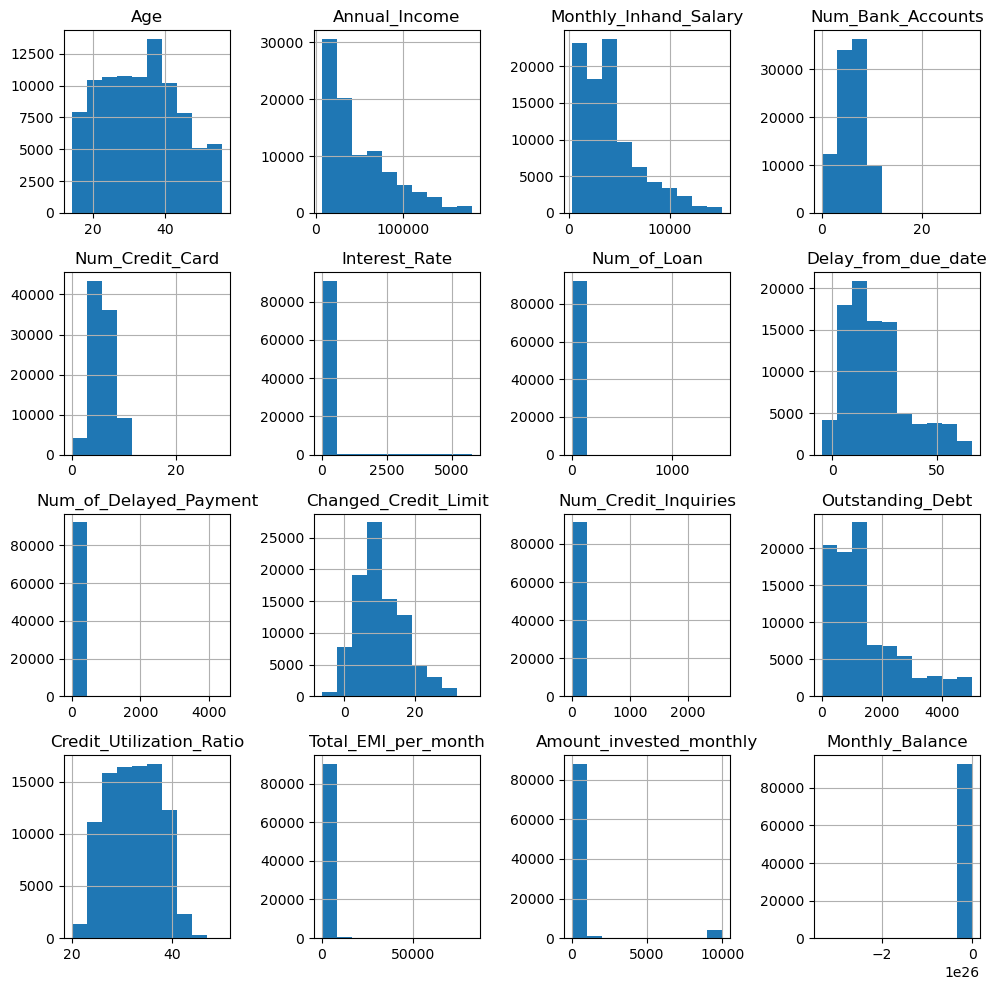

In [45]:
dataframe.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

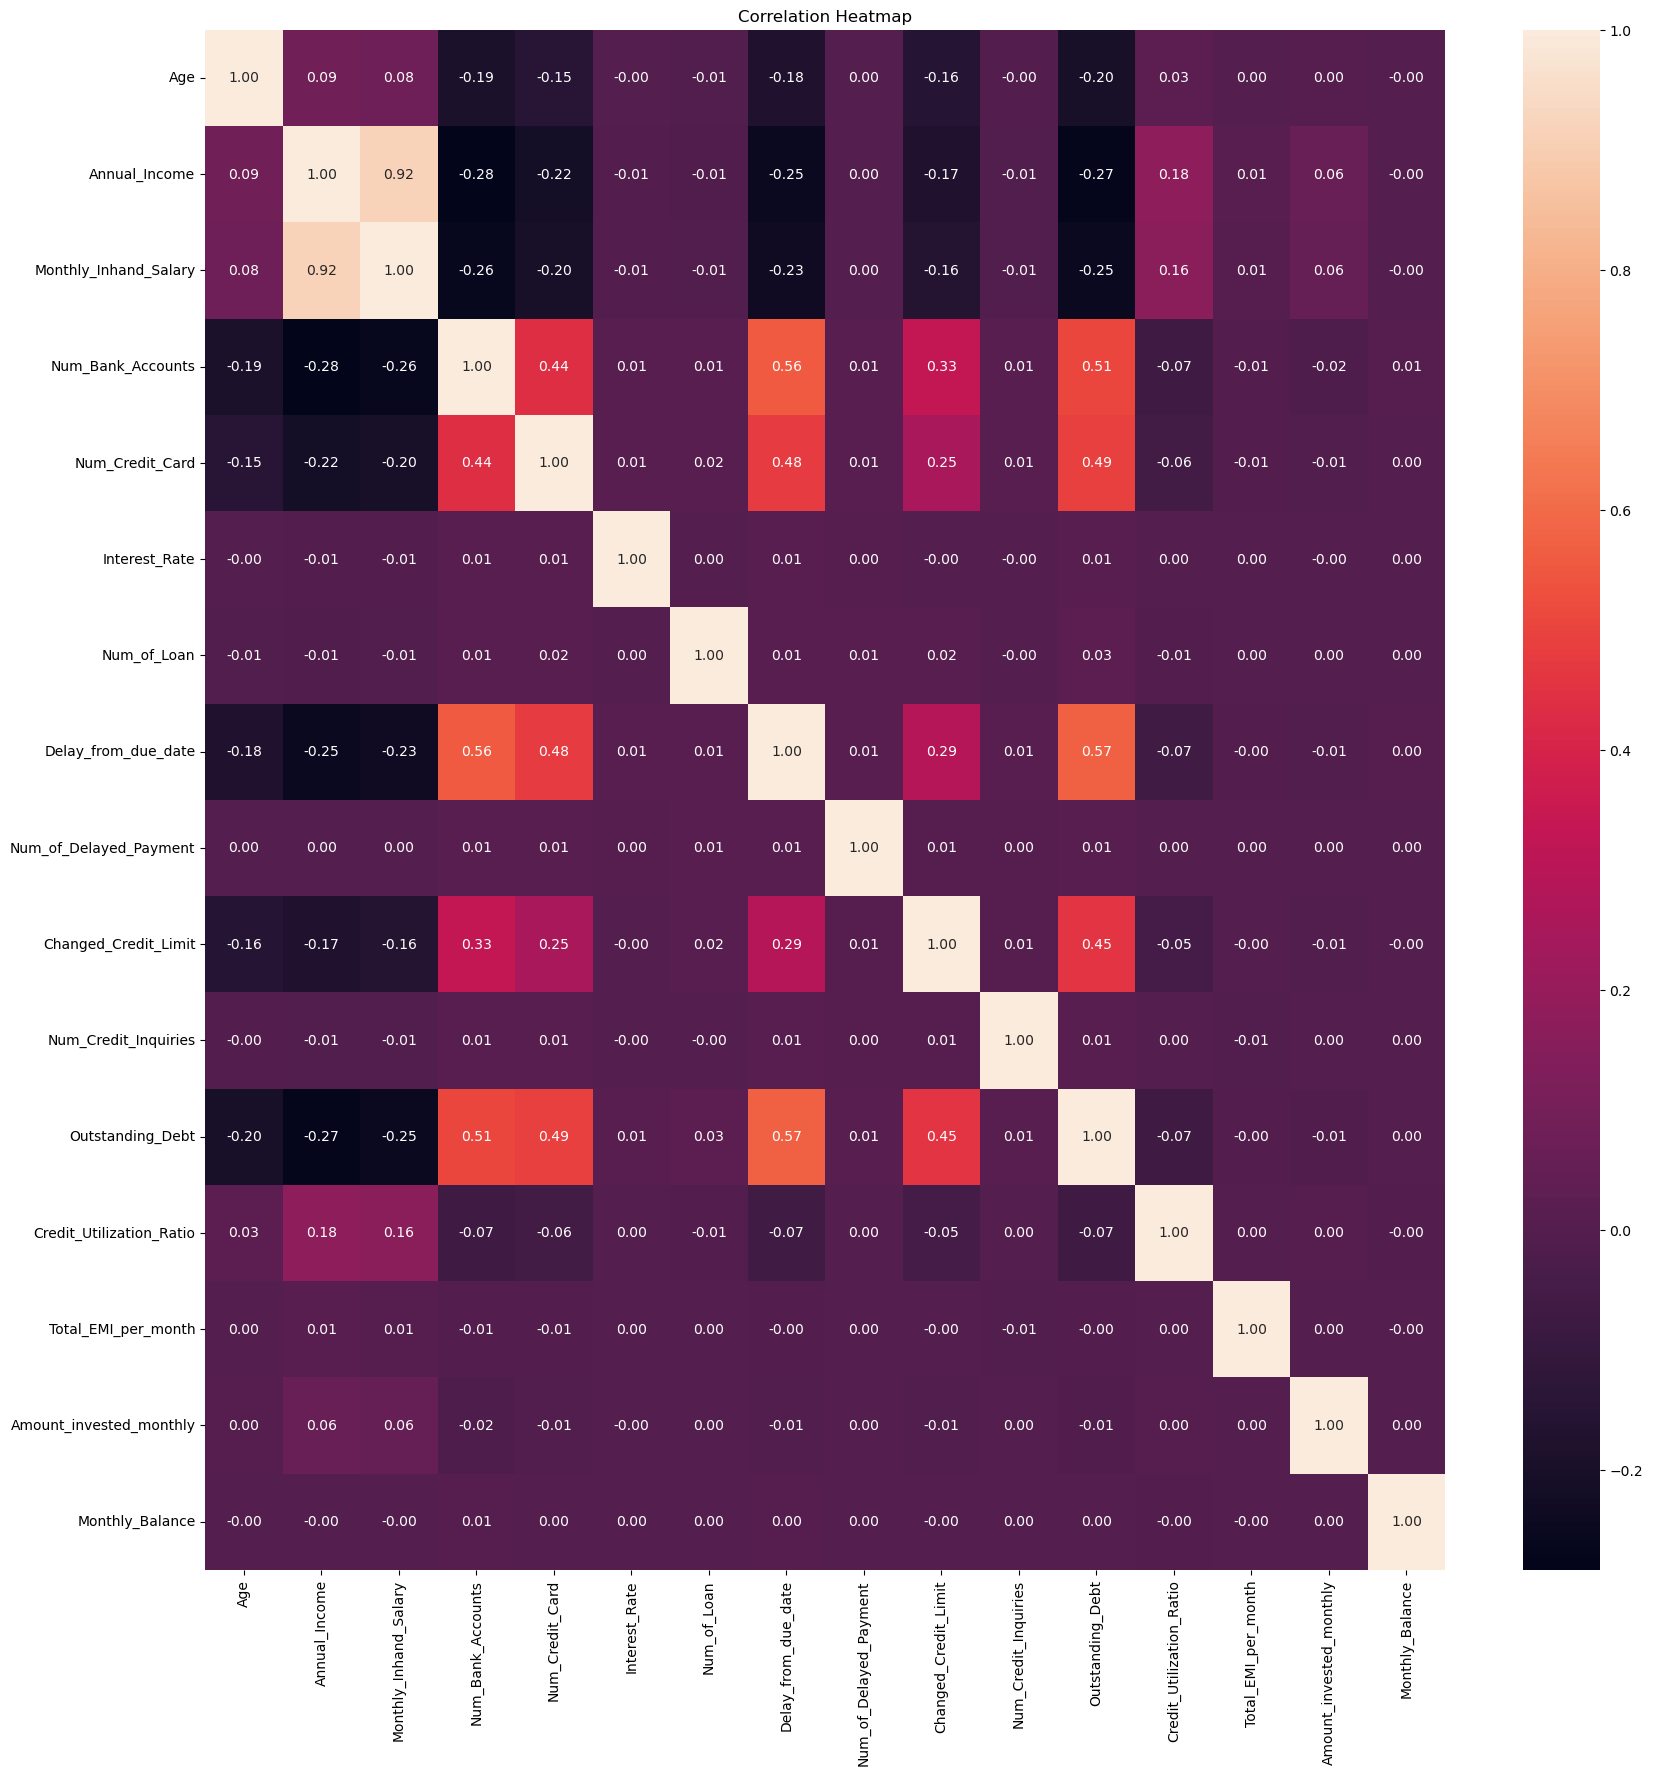

In [46]:
plt.figure(figsize=(20, 20))
correlation = dataframe[numeric_columns].corr()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [47]:
dataframe.drop(['Monthly_Inhand_Salary'],axis=1,inplace=True)
dataframe.columns

Index(['Customer_ID', 'Age', 'Occupation', 'Annual_Income',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [48]:
dataframe.drop(['Customer_ID'],axis=1,inplace=True)
dataframe.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

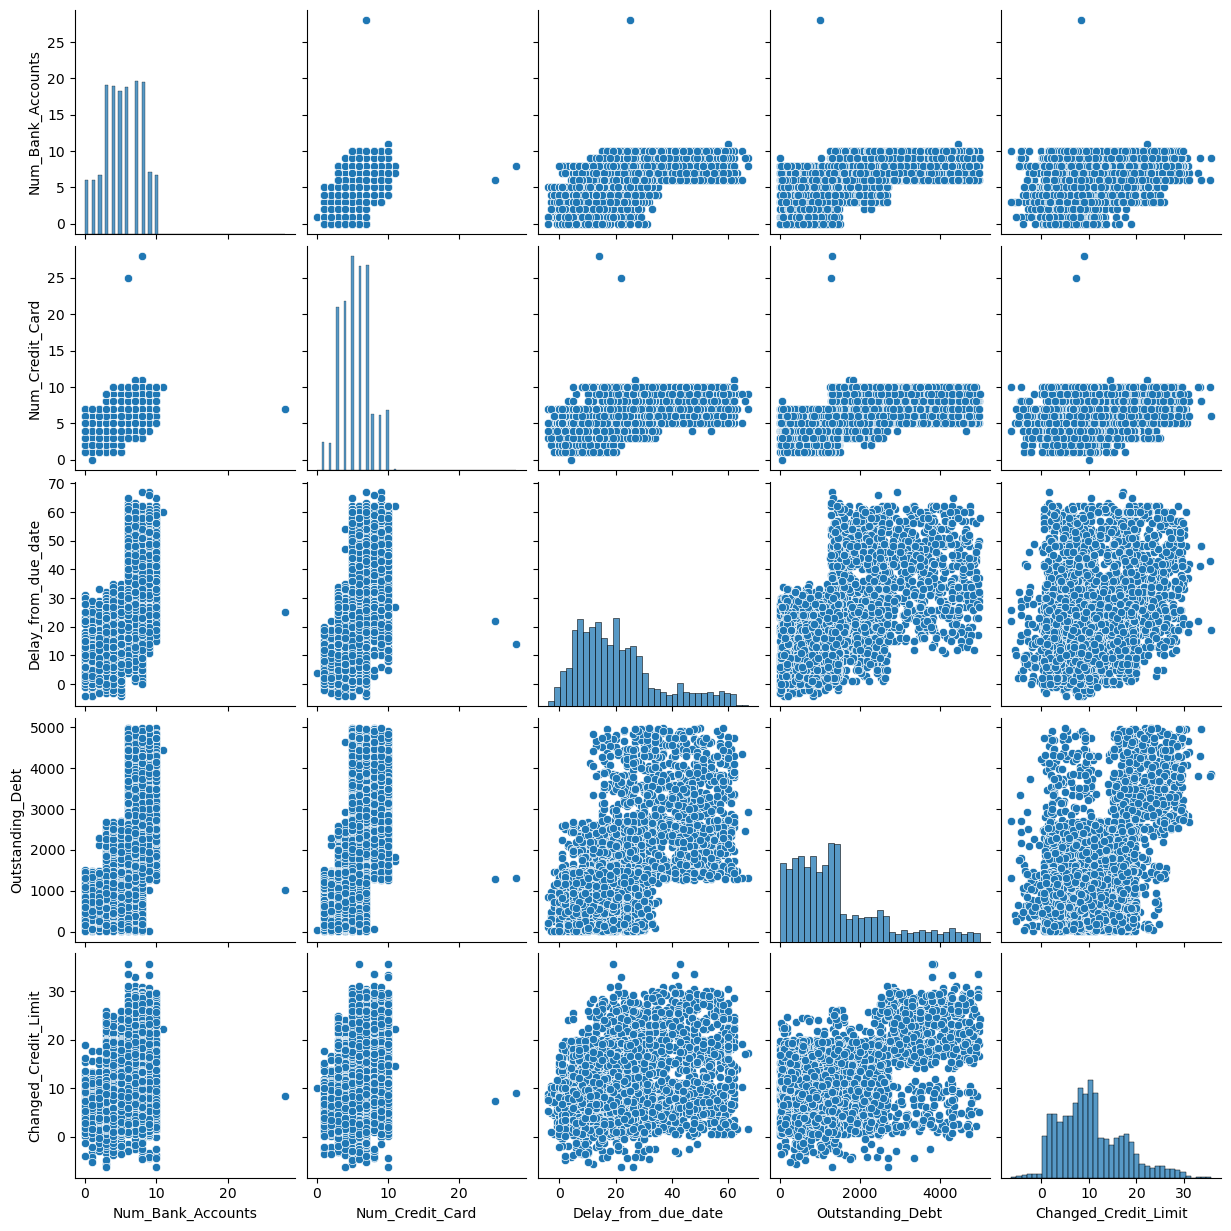

In [49]:
sampled_dataset = dataframe.sample(n=5000, random_state=42)
sns.pairplot(sampled_dataset[['Num_Bank_Accounts','Num_Credit_Card','Delay_from_due_date','Outstanding_Debt','Changed_Credit_Limit']])
plt.show()

In [50]:
mask = (correlation > 0.4) | (correlation < -0.4)
mask = mask.where(np.triu(np.ones(mask.shape), k=1).astype(bool))
high_correlation = correlation[mask].stack().reset_index()
high_correlation = high_correlation.rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
high_correlation = high_correlation[high_correlation['Correlation'] != 1.0]  # Exclude self-correlations

# Display the table
print("Pairs of features with correlation greater than 0.4 (either positive or negative):")
print(high_correlation)

Pairs of features with correlation greater than 0.4 (either positive or negative):
              Feature 1              Feature 2  Correlation
0         Annual_Income  Monthly_Inhand_Salary     0.919509
1     Num_Bank_Accounts        Num_Credit_Card     0.437907
2     Num_Bank_Accounts    Delay_from_due_date     0.558176
3     Num_Bank_Accounts       Outstanding_Debt     0.506100
4       Num_Credit_Card    Delay_from_due_date     0.475829
5       Num_Credit_Card       Outstanding_Debt     0.486848
6   Delay_from_due_date       Outstanding_Debt     0.572557
7  Changed_Credit_Limit       Outstanding_Debt     0.454808


In [51]:
categorical_columns


Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_columns:
    dataframe[col] = LabelEncoder().fit_transform(dataframe[col])
dataframe[categorical_columns]

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,12,128,3,180,1,3
1,12,128,1,86,1,4
2,12,128,1,184,1,5
3,12,128,1,185,1,6
4,12,128,1,186,1,2
...,...,...,...,...,...,...
92692,9,683,3,307,1,1
92693,9,683,3,308,1,2
92694,9,683,1,309,1,1
92695,9,683,1,310,1,4


In [53]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dataframe, test_size=0.5, random_state=42,shuffle=True)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42,shuffle=True)
print("Shape of Train_df:", train_df.shape)
print("Shape of Val_df:", val_df.shape)
print("Shape of Test_df:", test_df.shape)

Shape of Train_df: (46344, 22)
Shape of Val_df: (23172, 22)
Shape of Test_df: (23173, 22)


In [54]:
X_train = train_df[['Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age']]
y_train = train_df['Credit_Score']

X_val = val_df[['Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age']]
y_val = val_df['Credit_Score']
X_test = test_df[['Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age']]
y_test = test_df['Credit_Score']

# Display the shapes of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (46344, 14)
Shape of y_train: (46344,)
Shape of X_val: (23172, 14)
Shape of y_val: (23172,)
Shape of X_test: (23173, 14)
Shape of y_test: (23173,)


In [55]:
train_proportion = len(X_train) / len(dataframe)
val_proportion = len(X_val) / len(dataframe)
test_proportion = len(X_test) / len(dataframe)

train_proportion, val_proportion, test_proportion

(0.49999460561663195, 0.24999730280831597, 0.25000809157505205)

In [59]:
label_distribution = pd.DataFrame({
    'Overall': dataframe['Credit_Score'].value_counts(normalize=True),
    'Training': y_train.value_counts(normalize=True),
    'Validation': y_val.value_counts(normalize=True),
    'Testing': y_test.value_counts(normalize=True)
})

label_distribution

,Overall,Training,Validation,Testing
Standard,0.532199,0.533273,0.530079,0.532171
Poor,0.290196,0.290480,0.290480,0.289345
Good,0.177605,0.176247,0.179441,0.178484


In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.008, 0.05, 0.4, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10,20,30,50,100]
}

# Assuming X_train and y_train are already defined
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', random_state=42), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_classifier_lr = grid_search.best_estimator_
best_hyperparameters_lr = grid_search.best_params_
y_train_pred_lr = best_classifier_lr.predict(X_train)
y_val_pred_lr = best_classifier_lr.predict(X_val)
y_test_pred_lr = best_classifier_lr.predict(X_test)

print("Best Hyperparameters:", best_hyperparameters_lr)  # Best Hyperparameters

Best Hyperparameters: {'C': 0.05, 'max_iter': 100, 'solver': 'newton-cg'}


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classifier(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{label} Accuracy: {accuracy:.4f}")
    print(f"{label} Precision: {precision:.4f}")
    print(f"{label} Recall: {recall:.4f}")
    print(f"{label} F1 Score: {f1:.4f}")

# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_train, y_train_pred_lr, "Training")

Training Accuracy: 0.6110
Training Precision: 0.6099
Training Recall: 0.6110
Training F1 Score: 0.5934


In [58]:
evaluate_classifier(y_train, y_train_pred_lr, "Training")

Training Accuracy: 0.6110
Training Precision: 0.6099
Training Recall: 0.6110
Training F1 Score: 0.5934


In [59]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_test, y_test_pred_lr, "Test")

Test Accuracy: 0.6157
Test Precision: 0.6154
Test Recall: 0.6157
Test F1 Score: 0.5974


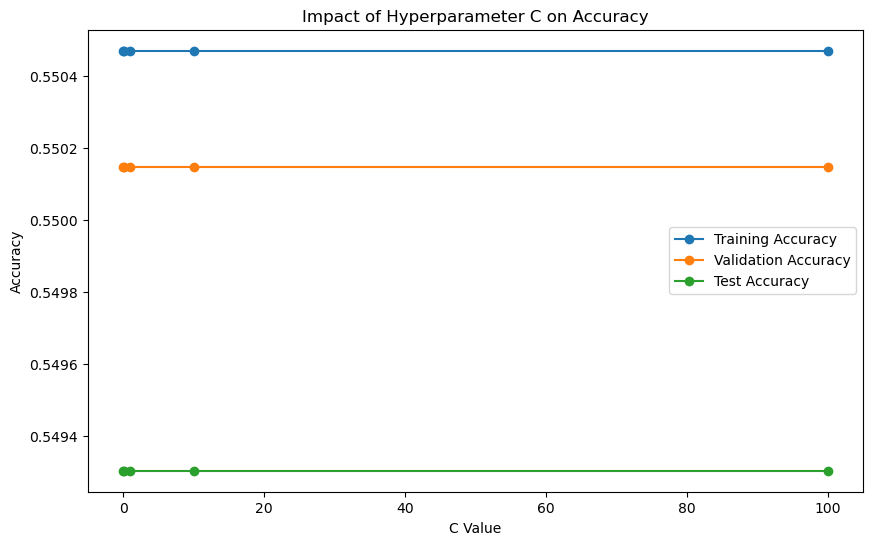

In [60]:
# Define the range of C values you want to visualize
C_values = [0.01, 0.1, 1, 10, 100]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for c in C_values:
    lr_model = LogisticRegression(multi_class='multinomial', C=c, solver='newton-cg', max_iter=10, random_state=42)
    lr_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter C on Accuracy')
plt.legend()
plt.show()